In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_rows", None, "display.max_columns", None)
portfolio = pd.read_csv('/Users/darigazaikenova/PycharmProjects/programming/my project/Berkshire.csv')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

portfolio.columns = [c.replace(' ', '_') for c in portfolio.columns]
portfolio.drop(['Name'], axis=1, inplace=True)
portfolio.rename(columns={ 'Symbol':'Ticker'},inplace=True)
                                           
#getting the stock tickers
tickers = portfolio['Ticker'].unique()
tickers

array(['WFC', 'KO', 'AXP', 'USB', 'IBM', 'PG', 'WMT', 'GM', 'PSX', 'MCO',
       'BK', 'COP', 'SU', 'DVA', 'VRSN', 'CBI', 'NOV', 'LMCA', 'STRZA',
       'MTB', 'MEG', 'COST', 'SNY', 'DE', 'GHC', 'VRSK', 'V', 'GSK', 'GE',
       'MDLZ', 'DISH', 'MA', 'JNJ', 'KRFT', 'LEE', 'UPS', 'XOM', 'GS',
       'LBTYA', 'VZ', 'LBTYK', 'CHTR', 'DNOW'], dtype=object)

In [2]:
portfolio.head(10)

,Date,Type,Ticker,Shares,Price
0,2013-06-28,Buy,WFC,46313.00000,41.27000
1,2013-06-28,Buy,KO,40000.00000,40.11000
2,2013-06-28,Buy,AXP,5161.00000,74.76000
3,2013-06-28,Buy,USB,7827.00000,36.15000
4,2013-06-28,Buy,IBM,6812.00000,191.11000
5,2013-06-28,Buy,PG,5279.00000,76.99000
6,2013-06-28,Buy,WMT,4924.00000,74.49000
7,2013-06-28,Buy,GM,4000.00000,33.31000
8,2013-06-28,Buy,PSX,2716.00000,58.91000
9,2013-06-28,Buy,MCO,2492.00000,60.93000


In [3]:
startdate = dt.datetime.strptime(portfolio.Date.min(),"%Y-%m-%d")
startdate = startdate + dt.timedelta(days= 1) #because yahoofinance downloads data starting the day before
startdate = startdate.date() 

today = dt.datetime.utcnow() + dt.timedelta(days= 1) # today's data
today_extra_holiday = dt.datetime.utcnow() + dt.timedelta(days= -4)
# if market is closed more than 2 days (eg, 15,16,17 Apr,2022 US stock exchange was closed)

In [4]:
def get(ticker):
    df_list =[]
    for ticker in tickers:
        df = yf.download(ticker, start=today_extra_holiday, end=today) #get data between the range
        df['Ticker'] = ticker
        df_list.append(df)
    df_final = pd.concat(df_list)
    return df_final

current_price = get(tickers) # some tickers are delisted

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
current_price.head(10)

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2022-07-25,43.53000,43.91000,43.21000,43.50000,43.50000,20297900.00000,WFC
2022-07-26,43.11000,43.68000,42.81000,42.90000,42.90000,15446700.00000,WFC
2022-07-27,42.98000,43.97000,42.69000,43.71000,43.71000,19498400.00000,WFC
2022-07-28,43.55000,43.83000,42.71000,43.32000,43.32000,14519400.00000,WFC
2022-07-25,61.55000,62.30000,61.31000,62.19000,62.19000,14941700.00000,KO
2022-07-26,62.75000,63.80000,62.53000,63.21000,63.21000,20118000.00000,KO
2022-07-27,62.88000,63.19000,61.79000,63.01000,63.01000,12142900.00000,KO
2022-07-28,62.92000,64.25000,62.89000,64.06000,64.06000,10833900.00000,KO
2022-07-25,154.25000,154.78000,151.21001,153.78999,153.78999,4213800.00000,AXP


In [6]:
current_price.drop_duplicates('Ticker', keep='last', inplace=True) 
#get the data in the range, leave only the latest data

In [7]:
current_price.head(10)

,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2022-07-28,43.55000,43.83000,42.71000,43.32000,43.32000,14519400.00000,WFC
2022-07-28,62.92000,64.25000,62.89000,64.06000,64.06000,10833900.00000,KO
2022-07-28,151.75999,152.64999,147.53999,152.14000,152.14000,3585900.00000,AXP
2022-07-28,48.12000,48.42000,45.82000,46.12000,46.12000,13266700.00000,USB
2022-07-28,128.75000,129.81000,128.61000,129.22000,129.22000,3911600.00000,IBM
2022-07-28,146.14000,148.61000,145.08000,148.06000,148.06000,7110800.00000,PG
2022-07-28,126.27000,130.50999,126.27000,129.75000,129.75000,11082300.00000,WMT
2022-07-28,35.01000,35.75000,34.60000,35.74000,35.74000,11788000.00000,GM
2022-07-28,89.24000,90.08000,86.70000,88.01000,88.01000,3252800.00000,PSX


In [8]:
current_price = current_price[['Adj Close', 'Ticker']]
current_price = current_price.rename(columns={'Adj Close':'Current Price'})
current_price.set_index('Ticker',inplace=True)

In [9]:
current_price.head()

,Current Price
Ticker,
WFC,43.32000
KO,64.06000
AXP,152.14000
USB,46.12000
IBM,129.22000


In [10]:
portfolio = portfolio.sort_values(['Ticker', 'Date'], ascending = [True, True])
portfolio['Buy/Sell Cash Flow'] = np.where(portfolio['Type'] == 'Buy', (-portfolio['Price'] * portfolio['Shares']), (portfolio['Price'] * portfolio['Shares']))
portfolio['Shares'] = np.where(portfolio['Type'] == 'Sell', -portfolio['Shares'], portfolio['Shares'])

In [11]:
portfolio['Shares Left'] = portfolio.groupby('Ticker')['Shares'].transform('sum')

In [12]:
portfolio['Fixed CF'] = portfolio.groupby('Ticker')['Buy/Sell Cash Flow'].transform('sum').round(4)

In [13]:
portfolio.head(10)

,Date,Type,Ticker,Shares,Price,Buy/Sell Cash Flow,Shares Left,Fixed CF
2,2013-06-28,Buy,AXP,5161.00000,74.76000,-385836.36000,5161.00000,-385836.36000
10,2013-06-28,Buy,BK,2464.00000,28.05000,-69115.20000,2464.00000,-69115.20000
15,2013-06-28,Buy,CBI,955.00000,59.66000,-56975.30000,1070.00000,-64818.30000
81,2014-06-30,Buy,CBI,115.00000,68.20000,-7843.00000,1070.00000,-64818.30000
77,2014-06-30,Buy,CHTR,1230.00000,158.38000,-194807.40000,1230.00000,-194807.40000
11,2013-06-28,Buy,COP,2412.00000,60.50000,-145926.00000,437.00000,2534.25000
41,2013-09-28,Sell,COP,-1059.00000,69.51000,73611.09000,437.00000,2534.25000
54,2013-12-31,Sell,COP,-244.00000,70.65000,17238.60000,437.00000,2534.25000
85,2014-06-30,Sell,COP,-672.00000,85.73000,57610.56000,437.00000,2534.25000
21,2013-06-28,Buy,COST,433.00000,110.57000,-47876.81000,433.00000,-47876.81000


In [14]:
portfolio_1 = portfolio.drop_duplicates(subset='Ticker', keep='first')
portfolio_1.head()

,Date,Type,Ticker,Shares,Price,Buy/Sell Cash Flow,Shares Left,Fixed CF
2,2013-06-28,Buy,AXP,5161.00000,74.76000,-385836.36000,5161.00000,-385836.36000
10,2013-06-28,Buy,BK,2464.00000,28.05000,-69115.20000,2464.00000,-69115.20000
15,2013-06-28,Buy,CBI,955.00000,59.66000,-56975.30000,1070.00000,-64818.30000
77,2014-06-30,Buy,CHTR,1230.00000,158.38000,-194807.40000,1230.00000,-194807.40000
11,2013-06-28,Buy,COP,2412.00000,60.50000,-145926.00000,437.00000,2534.25000


In [15]:
portfolio_final = pd.merge(portfolio_1, current_price, how='left', on='Ticker')

In [16]:
portfolio_final = portfolio_final.drop(['Shares', 'Price', 'Type', 'Buy/Sell Cash Flow'], axis=1)

In [17]:
portfolio_final['Notfixed Cash Flow'] = portfolio_final['Current Price'] * portfolio_final['Shares Left']
portfolio_final['Notfixed Cash Flow'].fillna(0, inplace=True)
portfolio_final['Cash Flow Per Row'] = portfolio_final['Fixed CF'] + portfolio_final['Notfixed Cash Flow']

In [18]:
portfolio_final['Current Price'].fillna(0, inplace=True)

In [19]:
portfolio_final.head(10)

,Date,Ticker,Shares Left,Fixed CF,Current Price,Notfixed Cash Flow,Cash Flow Per Row
0,2013-06-28,AXP,5161.00000,-385836.36000,152.14000,785194.53685,399358.17685
1,2013-06-28,BK,2464.00000,-69115.20000,43.03000,106025.91699,36910.71699
2,2013-06-28,CBI,1070.00000,-64818.30000,0.07000,74.90000,-64743.40000
3,2014-06-30,CHTR,1230.00000,-194807.40000,435.57999,535763.38348,340955.98348
4,2013-06-28,COP,437.00000,2534.25000,94.06000,41104.21893,43638.46893
5,2013-06-28,COST,433.00000,-47876.81000,536.17999,232165.93683,184289.12683
6,2013-06-28,DE,397.00000,-32256.25000,331.63000,131657.11194,99400.86194
7,2013-06-28,DISH,0.00000,831.60000,18.05000,0.00000,831.60000
8,2014-06-30,DNOW,182.00000,-6590.22000,10.81000,1967.42008,-4622.79992
9,2013-06-28,DVA,3760.00000,-314218.02000,83.41000,313621.61377,-596.40623


# Actual return on portfolio

In [20]:
gained_profit_or_loss = portfolio_final['Cash Flow Per Row'].sum()
gained_profit_or_loss

3709685.024683571

In [21]:
portfolio['Sum Price'] = np.where(portfolio['Type'] == 'Buy', (portfolio['Price'] * portfolio['Shares']), 0)
portfolio.head(10)

,Date,Type,Ticker,Shares,Price,Buy/Sell Cash Flow,Shares Left,Fixed CF,Sum Price
2,2013-06-28,Buy,AXP,5161.00000,74.76000,-385836.36000,5161.00000,-385836.36000,385836.36000
10,2013-06-28,Buy,BK,2464.00000,28.05000,-69115.20000,2464.00000,-69115.20000,69115.20000
15,2013-06-28,Buy,CBI,955.00000,59.66000,-56975.30000,1070.00000,-64818.30000,56975.30000
81,2014-06-30,Buy,CBI,115.00000,68.20000,-7843.00000,1070.00000,-64818.30000,7843.00000
77,2014-06-30,Buy,CHTR,1230.00000,158.38000,-194807.40000,1230.00000,-194807.40000,194807.40000
11,2013-06-28,Buy,COP,2412.00000,60.50000,-145926.00000,437.00000,2534.25000,145926.00000
41,2013-09-28,Sell,COP,-1059.00000,69.51000,73611.09000,437.00000,2534.25000,0.00000
54,2013-12-31,Sell,COP,-244.00000,70.65000,17238.60000,437.00000,2534.25000,0.00000
85,2014-06-30,Sell,COP,-672.00000,85.73000,57610.56000,437.00000,2534.25000,0.00000
21,2013-06-28,Buy,COST,433.00000,110.57000,-47876.81000,433.00000,-47876.81000,47876.81000


In [22]:
intial_budget = portfolio['Sum Price'].sum()
intial_budget

9221878.989400001

In [23]:
#actual return = (ending value-beginning value)/ beginning value = actual return

return_on_portfolio = gained_profit_or_loss/ intial_budget
return_on_portfolio

0.402269974367223

# Calculating Return of indexes

In [24]:
indexes = ['^GSPC', '^IXIC']

In [25]:
# get index data on the start date
def get2(indexes, startdate):
    df_list =[]
    for index in indexes:
        df = yf.download(index, start=startdate, end=startdate)
        df['Index'] = index
        df_list.append(df)
        
    df_final = pd.concat(df_list)
    return df_final

index_startdate = get2(indexes, startdate)
index_startdate = index_startdate[['Adj Close', 'Index']]
index_startdate

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Adj Close,Index
Date,,
2013-06-28,1606.28003,^GSPC
2013-06-28,3403.25000,^IXIC


In [26]:
# get index data on the end date
def get22(indexes):
    df_list =[]

    for index in indexes:
        df = yf.download(index, start=today_extra_holiday, end=today)
        df['Index'] = index
        df_list.append(df)
        
    df_final = pd.concat(df_list)
    return df_final

index_enddate = get22(indexes)
index_enddate.drop_duplicates('Index', keep='last', inplace=True) #get the data in the range, leave only the latest data
index_enddate = index_enddate[['Adj Close', 'Index']]
index_enddate

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Adj Close,Index
Date,,
2022-07-28,4072.42993,^GSPC
2022-07-28,12162.58984,^IXIC


In [27]:
market_index = pd.merge(index_startdate, index_enddate, on='Index')
market_index.rename(columns= {'Adj Close_x': 'Adj Close startdate', 'Adj Close_y': 'Adj Close enddate'}, inplace=True)
market_index['Return'] = (market_index['Adj Close enddate'] - market_index['Adj Close startdate']) / market_index['Adj Close startdate']
market_index = market_index[['Return', 'Index']]
market_index.set_index('Index', inplace=True)
market_index

,Return
Index,
^GSPC,1.53532
^IXIC,2.57382


# Portfolio Analysis (Graphs)

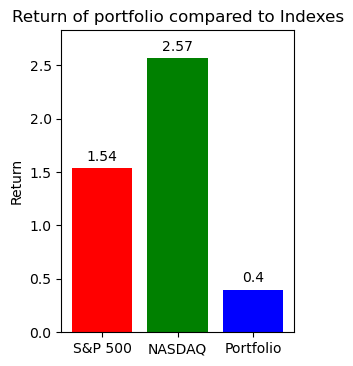

In [28]:
import matplotlib.ticker as tkr
sp500 = market_index.loc['^GSPC',"Return"]
nsdq = market_index.loc['^IXIC',"Return"]

values = [sp500, nsdq, return_on_portfolio]
def rounding(values):
    values_rounded = []
    for value in values:
        rounded = round(value, 2)
        values_rounded.append(rounded)
    return values_rounded
values_rounded = rounding(values)
colors = ['r', 'g', 'b']

# Data Visualization
fig, ax = plt.subplots(figsize=(3,4), dpi=100)
plt.bar(range(0,len(values_rounded)), values_rounded, color=colors)

plt.xticks(range(0,len(values_rounded)), ('S&P 500', 'NASDAQ', 'Portfolio'))
plt.ylabel("Return")
plt.title('Return of portfolio compared to Indexes')
plt.bar_label(ax.containers[0], label_type='edge', padding=3)
plt.margins(y=0.10)

In [29]:
def comparing_with_indexes (return_on_portfolio, sp500, nsdq):
    if return_on_portfolio > sp500 and return_on_portfolio > sp500:
        print('Congratulations, your portfolio is performing better than S&P500 and NASDAQ! Keep up!')
    elif return_on_portfolio > sp500 and return_on_portfolio < sp500:
        print('Your portfolio is performing better than S&P500, but worse than NASDAQ!')
    elif return_on_portfolio < sp500 and return_on_portfolio > sp500:
        print('Your portfolio is performing worse than S&P500, but better than NASDAQ!')
    else:
        print('Unfortunatelly, your portfolio is performing worse than S&P500 and NASDAQ. It\'s  better if you change the strategy')

comparing_with_indexes (return_on_portfolio, sp500, nsdq)

Unfortunatelly, your portfolio is performing worse than S&P500 and NASDAQ. It's  better if you change the strategy


In [30]:
portfolio_final.set_index('Ticker',inplace=True)

# list of losing trades
list_of_losing_trades = portfolio_final[(portfolio_final['Cash Flow Per Row'] < 0)].index.tolist()
print('Here is the list of tickers which were unprofitable: {}'.format(list_of_losing_trades))
# portfolio_final[portfolio_final["Cash Flow Per Row"] < 0]

Here is the list of tickers which were unprofitable: ['CBI', 'DNOW', 'DVA', 'IBM', 'KRFT', 'LBTYA', 'LBTYK', 'LMCA', 'NOV', 'SNY', 'STRZA', 'VZ']
